# Data Science – Parkinson's Disease Classification
https://fenix.tecnico.ulisboa.pt/disciplinas/CDadosi7/2019-2020/1-semestre

---

The students should perform a statistical analysis of the datasets in advance and summarize relevant implications in the report, such as the underlying distributions and hypothesized forms feature dependency.
## Preprocessing
In accordance with the properties of the input dataset and the behavior of the target learning algorithm, the
students are allowed to apply preprocessing techniques when needed or under a solid conjecture of its potential
impact on learning.

## Data Set Information
The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physicianâ€™s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.

## Attribute Information
Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

---
---

In [1]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
# Read the dataset and skip the first row
df = pd.read_csv("dataset/pd_speech_features.csv", skiprows=1)

## 1. Statistical description (5%)

In [4]:
# The dataset consists of 755 columns
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [5]:
# Describe the dataset
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [6]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


#### How many participants are in the dataframe?

In [7]:
print("There are", len(df.groupby(df.id).first().gender), "unique participant ids in the dataset.")

There are 252 unique participant ids in the dataset.


#### Are all of the records of each participant already classified?
Or is there anybody who was had no Parkinsons but then turned out to be positive?

In [8]:
# There are no people who were diagnosed with alzheimer after the measurements were started
df.groupby([df["id"]])["class"].mean().isin([0, 1]).value_counts()

True    252
Name: class, dtype: int64

#### Are there any missing values?

In [9]:
print("There are %d NA and %d null values." % (df[df.isna().any(axis=1)].__len__(), 
                                               df[df.isnull().any(axis=1)].__len__()))

There are 0 NA and 0 null values.


#### Gender vs target variable

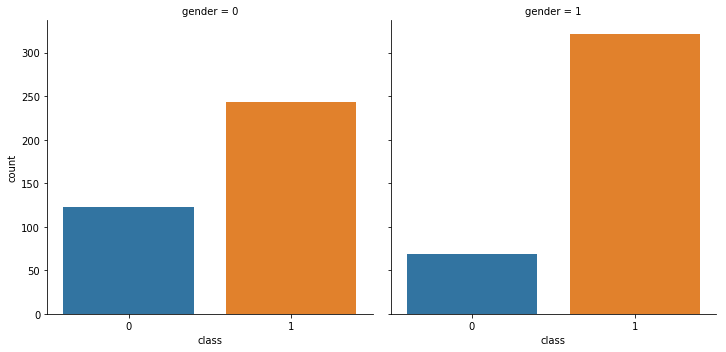

In [10]:
import seaborn as sns

# How does the parkinsons disease depend on the gender?
plot = sns.catplot(x="class", col="gender", data=df, kind="count")

#### Target variable

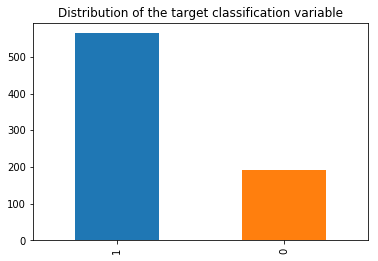

In [11]:
fig, ax = plt.subplots()
fig = df["class"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Distribution of the target classification variable")
plt.show()

In [12]:
columns_start = 1
columns_end = 21

def choose_grid(nr):
    # // 4 + 1
    return nr // 4, 4 

<Figure size 432x288 with 0 Axes>

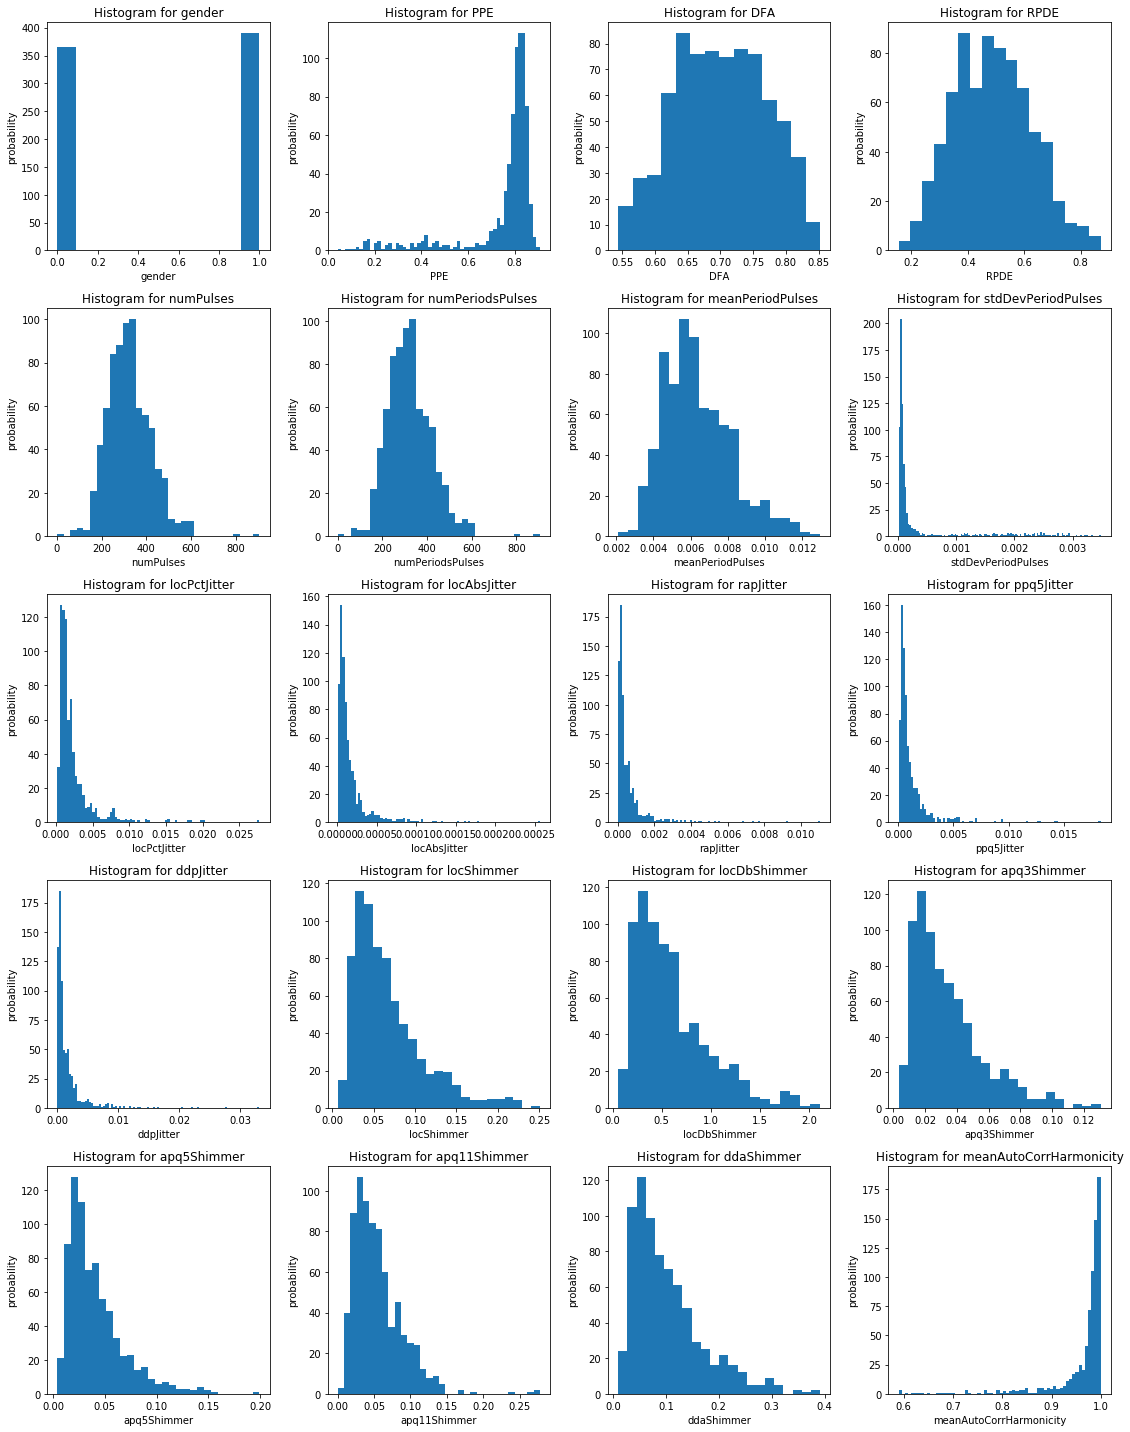

In [13]:
columns = df.iloc[:,columns_start:columns_end].select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram for %s'%columns[n])
    axs[i, j].set_xlabel(columns[n])
    axs[i, j].set_ylabel("probability")
    axs[i, j].hist(df.iloc[:,columns_start:columns_end][columns[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

#### Correlation matrix
The number of paramaters is really high

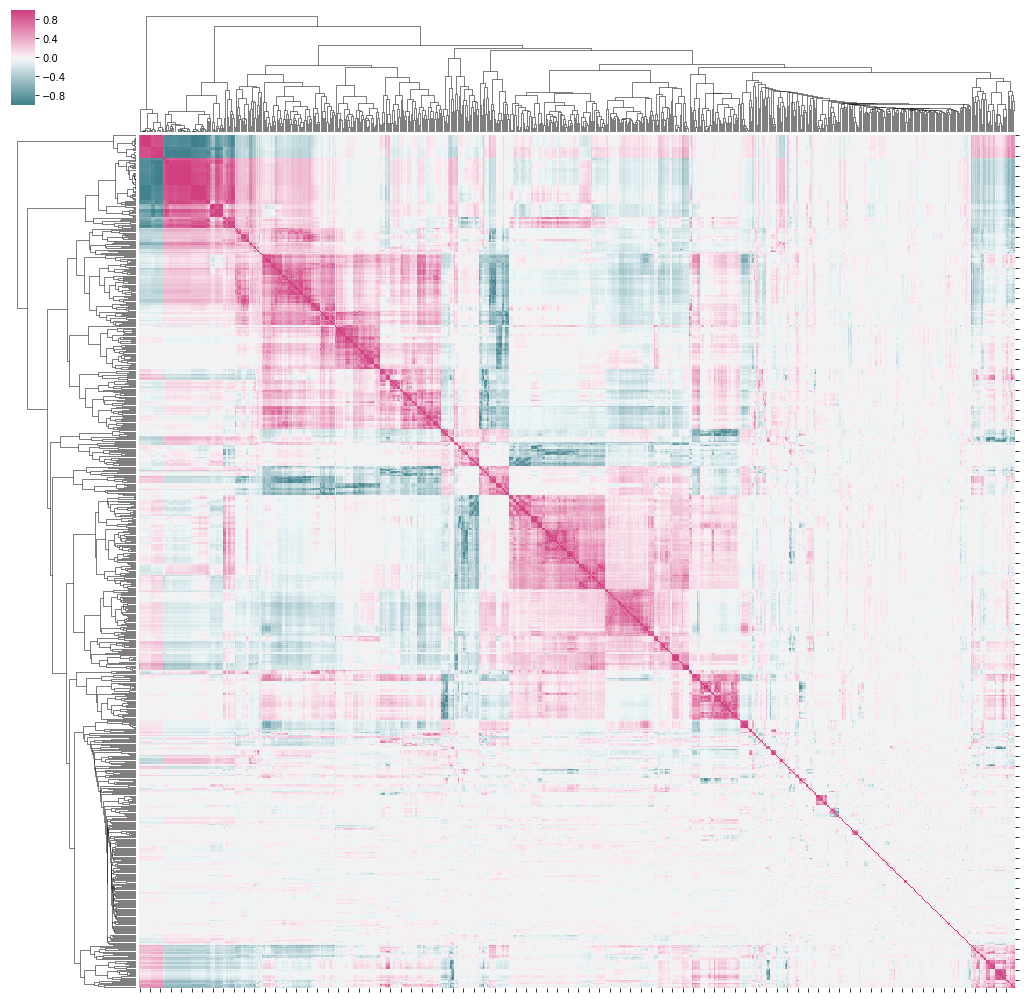

In [20]:
cmap = sns.diverging_palette(h_neg=210, h_pos=350, as_cmap=True)
graph = sns.clustermap(df.corr(), figsize=(18, 18), cmap=cmap);
a = graph.ax_heatmap.set_xticklabels([])
a = graph.ax_heatmap.set_yticklabels([])

#### Correlation of attributes with the target variable

In [21]:
# Calculate the correlation of each attribute
corcolumns = df.drop(columns=["class"]).corrwith(df["class"])
corcolumns = pd.DataFrame(corcolumns, columns=["correlation"])
corcolumns["abs_correlation"] = abs(corcolumns.correlation)

# Sort the most correlated values
corcolumns = corcolumns.sort_values(by="abs_correlation", ascending=False)

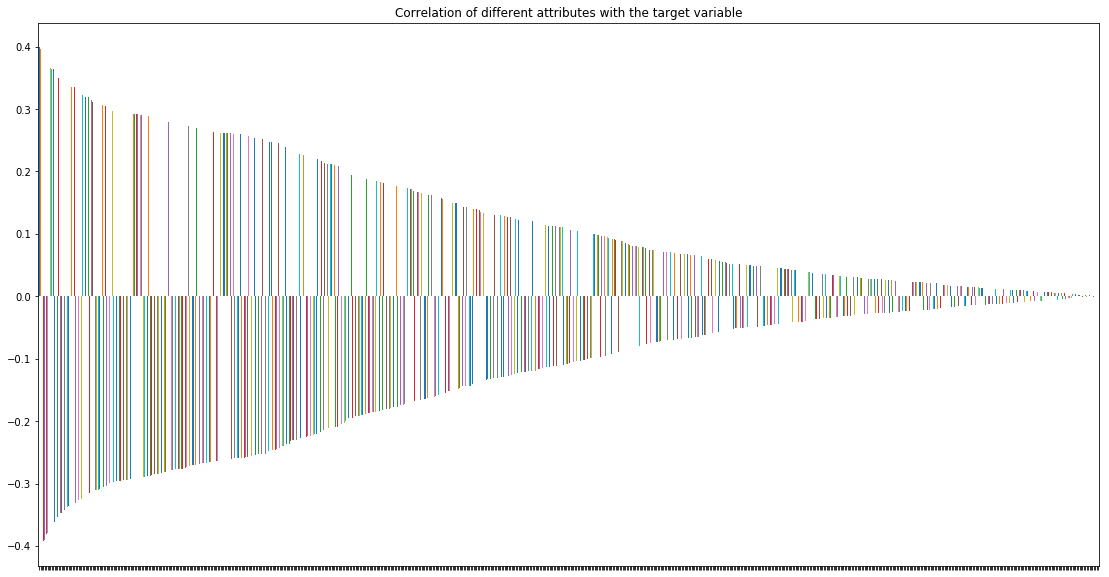

In [22]:
fig, ax = plt.subplots(figsize=(19, 10))
corcolumns.correlation.plot(kind="bar", title="Correlation of different attributes with the target variable", ax=ax)
ax.set_xticklabels([])
plt.show()

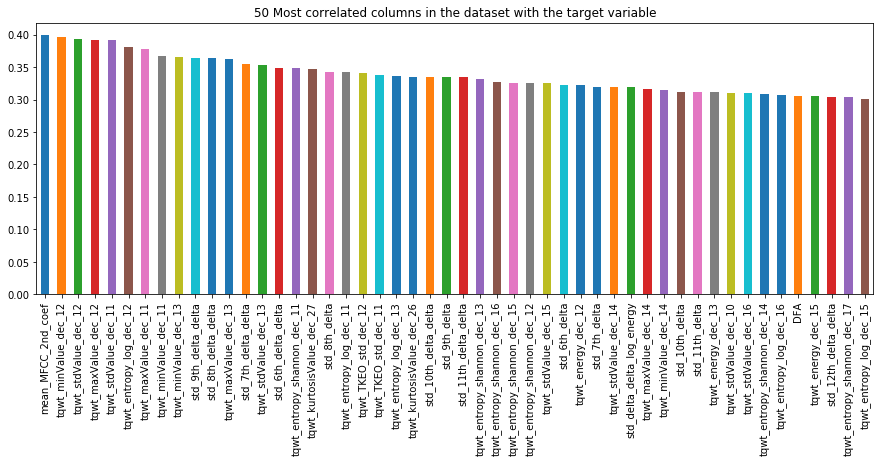

In [32]:
plt.figure(figsize=(15, 5))
corcolumns.abs_correlation.iloc[:50].plot(kind="bar", title="50 Most correlated columns in the dataset with the target variable")
plt.show()

## Preprocessing (20%)
- Average the data samples?
- Create 3 different datasets by each patient?

**Tips from the lab:**
- subsampling
    - select only some of the data
- oversampling
    - suplicate some data
    - works for some algorithms
- SMOTE
    - looks for similiar variables

Tip for the second dataset:
> We should do subsampling on the second dataset. Some classes are really unbalanced?

Columns which should not be used for learning: ID

### Train / Test / Validation

- Stratified validation?
- Should preprocessing be done inside cross validation?

Data will be split 65% train, 20% test, 15% validation. Cross validation is used instead of the train/test array.

In [23]:
train_size, test_size, valid_size = (0.65, 0.20, 0.15)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns=["class"])
y = df["class"]

X_merge, X_valid, y_merge, y_valid = train_test_split(X, y, test_size=valid_size, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_merge, y_merge, test_size=test_size/train_size, random_state=42)

## Unsupervised (15%)
- Association Rules (7.5%)
- Clustering (7.5%)

### Association Rules (7.5%)

### Clustering (7.5%)

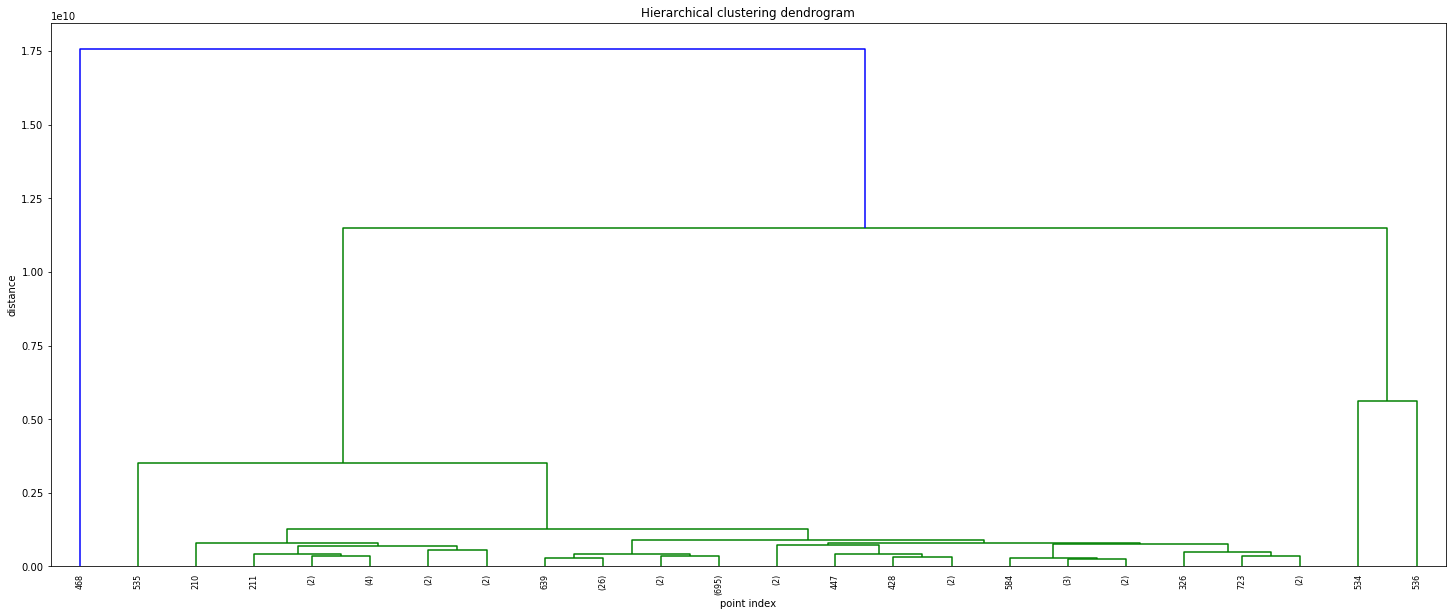

In [107]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

def dendrogram_plot(data):
    linkageMatrix = linkage(data.drop(columns=["id"]), "single")

    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical clustering dendrogram')
    plt.xlabel('point index')
    plt.ylabel('distance')
    dendrogram(linkageMatrix, truncate_mode='lastp', p=24,
        leaf_rotation=90., leaf_font_size=8.)
    plt.show()
    
dendrogram_plot(df)

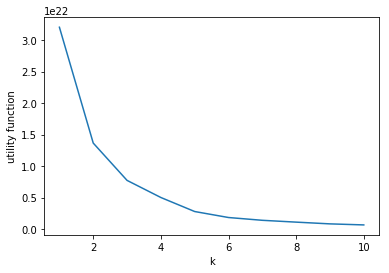

In [108]:
from sklearn.cluster import KMeans
import numpy as np

def elbow_plot(data):
    # Find the best number of clusters
    inertia = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, random_state=420)
        kmeans.fit(data.drop(columns=["id"]))
        inertia.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.plot(range(1,11), inertia)
    plt.xlabel("k")
    plt.ylabel('utility function')
    plt.show()

elbow_plot(df)

In [109]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(data, colors):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    for i, v in enumerate(sorted(data["cluster"].unique())):
        clusterdata = data[data["cluster"] == v]
        ax.scatter(clusterdata.x, clusterdata.y, clusterdata.z, c = colors[i], alpha=0.5, marker="x")

def plot_2d(data, colors):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    for i, v in enumerate(sorted(data["cluster"].unique())):
        clusterdata = data[data["cluster"] == v]
        cld_t = clusterdata[clusterdata["class"] == 1]
        cld_f = clusterdata[clusterdata["class"] == 0]
        ax.scatter(cld_t.x, cld_t.y, c = colors[i], alpha=0.5, marker="x")
        ax.scatter(cld_f.x, cld_f.y, c = colors[i], alpha=0.5, marker="o")

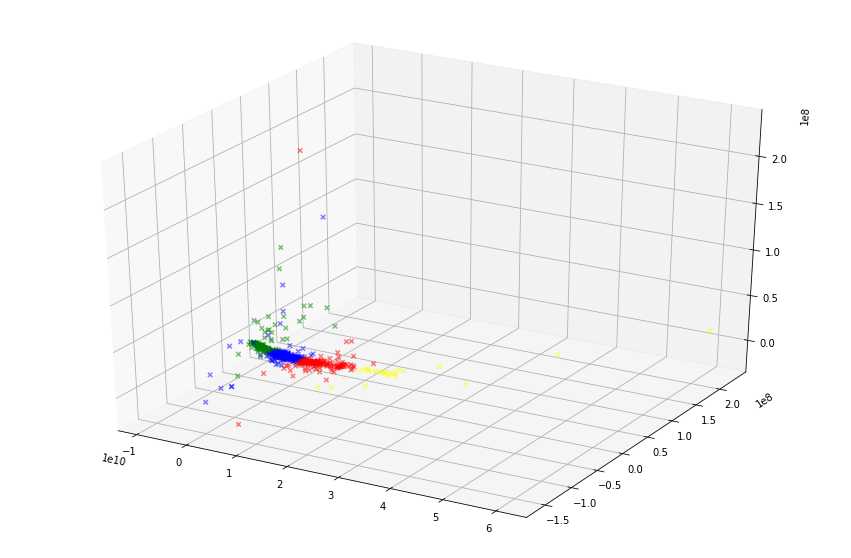

In [110]:
dfc = df.copy()
dfc['cluster'] = KMeans(n_clusters=4, init='k-means++', random_state=420).fit_predict(df.drop(columns=["id"]))

# Reduce dimensionality to 3D
_dfc = PCA(n_components=3).fit_transform(dfc.drop(columns=["id", "cluster"]))

dfc["x"] = _dfc[:,0]
dfc["y"] = _dfc[:,1]
dfc["z"] = _dfc[:,2]

plot_3d(dfc, ["red", "green", "blue", "yellow", "violet"])

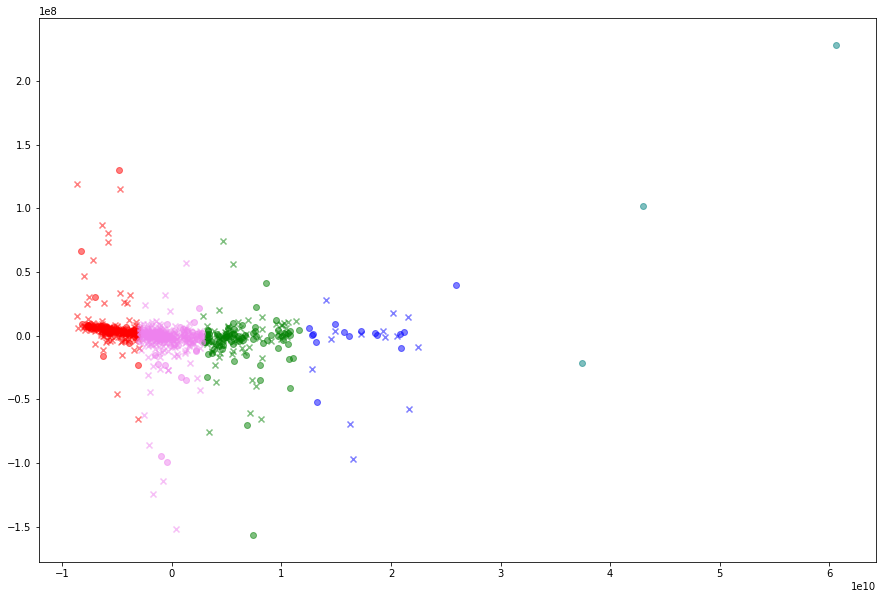

In [111]:
dfc = df.copy()
dfc['cluster'] = KMeans(n_clusters=5, init='k-means++', random_state=420).fit_predict(df.drop(columns=["id"]))

# Reduce dimensionality to 3D
_dfc = PCA(n_components=2).fit_transform(dfc.drop(columns=["id", "cluster"]))

dfc["x"] = _dfc[:,0]
dfc["y"] = _dfc[:,1]

plot_2d(dfc, ["red", "green", "blue", "violet", "teal"])

## Classification (20%)
- Naïve Bayes (2%)
- **Instance-based Learning (3%)**
- Decision Trees (5%)
- Random Forests (5%)
- XGBoost (5%)

In [27]:
# Best model results are stored in the results dictionary
results = {}

### GaussianNB - Naïve Bayes (2%)
- Does not work with correlated columns

| description                    | score  |
| ------------------------------ | ------ |
| No preprocessing               | 0.7523 |
| PCA (n=1)                      | 0.7617 |
| SelectKBest (k=28)             | 0.8130 |

#### Original dataset

In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gaus = GaussianNB().fit(X_merge, y_merge)
results["GaussianNB"] = cross_val_score(gaus, X_merge, y_merge, cv=5, verbose=0, n_jobs=8).mean()
print("GaussianNB score: {:0.4f}".format(cross_val_score(gaus, X_merge, y_merge, cv=5, verbose=0, n_jobs=8).mean()))

GaussianNB score: 0.7523


#### Select K best parameters

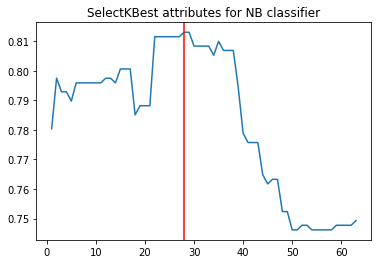

Best value 0.8130 with k=28.


In [114]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

x, y = ([], [])
for i in range(1, 64, 1):
    XX = SelectKBest(f_classif, k=i).fit_transform(X_merge, y_merge)
    g = GaussianNB().fit(XX, y_merge)
    x.append(i)
    y.append(cross_val_score(g, XX, y_merge, cv=5, n_jobs=8).mean())

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("SelectKBest attributes for NB classifier")
ax.axvline(y.index(max(y))+1, c="red")
plt.show()

print("Best value {:0.4f} with k={}.".format(max(y), x[y.index(max(y))]))

#### PCA

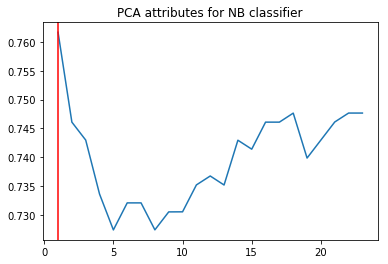

Best value 0.7617 with k=1.


In [115]:
from sklearn.decomposition import PCA

x, y = ([], [])
for i in range(1, 24, 1):
    XX = PCA(n_components=i).fit_transform(X_merge)
    g = GaussianNB().fit(XX, y_merge)
    x.append(i)
    y.append(cross_val_score(g, XX, y_merge, cv=5, n_jobs=8).mean())

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("PCA attributes for NB classifier")
ax.axvline(y.index(max(y))+1, c="red")
plt.show()

print("Best value {:0.4f} with k={}.".format(max(y), x[y.index(max(y))]))

### KNeighborsClassifier – Instance-based Learning (3%)
- Suffers from curse of dimensionality, should normalize

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'n_neighbors': np.arange(1, 15),
        'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
        'weights': ["uniform", "distance"],
        'leaf_size': np.arange(2, 40, 5)
       }

knnclas = GridSearchCV(KNeighborsClassifier(), grid, cv=5, verbose=2, n_jobs=8).fit(X_merge, y_merge)
results["KNeighborsClassifier"] = knnclas.best_score_.mean()
print("KNeighborsClassifier best score: {} for {}.".format(knnclas.best_score_, knnclas.best_params_))

KNeighborsClassifier best score: 0.7679127725856698 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 11, 'weights': 'uniform'}.


KNeighborsClassifier best score: 0.7679127725856698 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 11, 'weights': 'uniform'}.

#### KNeighborsClassifier

Most likely achieves this good results thanks to overtraining.
##### Not Normalized

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'n_neighbors': np.arange(1, 15),
        'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
        'weights': ["uniform", "distance"],
        'leaf_size': np.arange(2, 40, 5)
       }

knnclas = GridSearchCV(KNeighborsClassifier(), grid, cv=5, verbose=v, n_jobs=8).fit(X_merge, y_merge)
results["KNeighborsClassifier"] = knnclas.best_score_.mean()
print("KNeighborsClassifier best score: {} for {}.".format(knnclas.best_score_, knnclas.best_params_))

KNeighborsClassifier best score: 0.7679127725856698 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 11, 'weights': 'uniform'}.

##### Normalized data

In [32]:
from sklearn.preprocessing import Normalizer
XX = Normalizer().fit_transform(X_merge)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'n_neighbors': np.arange(1, 15),
        'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
        'weights': ["uniform", "distance"],
        'leaf_size': np.arange(2, 40, 5)
       }

knnclas = GridSearchCV(KNeighborsClassifier(), grid, cv=5, verbose=2, n_jobs=8).fit(XX, y_merge)
results["KNeighborsClassifier"] = knnclas.best_score_.mean()
print("KNeighborsClassifier best score: {} for {}.".format(knnclas.best_score_, knnclas.best_params_))

Fitting 5 folds for each of 896 candidates, totalling 4480 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    7.3s
[Parallel(n_jobs=8)]: Done 393 tasks      | elapsed:   10.5s
[Parallel(n_jobs=8)]: Done 959 tasks      | elapsed:   15.4s
[Parallel(n_jobs=8)]: Done 1689 tasks      | elapsed:   23.0s
[Parallel(n_jobs=8)]: Done 2579 tasks      | elapsed:   37.9s
[Parallel(n_jobs=8)]: Done 4223 tasks      | elapsed:   49.1s


KNeighborsClassifier best score: 0.7554517133956387 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 5, 'weights': 'distance'}.


[Parallel(n_jobs=8)]: Done 4480 out of 4480 | elapsed:   50.0s finished


##### Standardized data

In [35]:
from sklearn.preprocessing import StandardScaler
XX = StandardScaler().fit_transform(X_merge)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'n_neighbors': np.arange(1, 15),
        'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
        'weights': ["uniform", "distance"],
        'leaf_size': np.arange(2, 40, 5)
       }

knnclas = GridSearchCV(KNeighborsClassifier(), grid, cv=5, verbose=2, n_jobs=8).fit(XX, y_merge)
results["KNeighborsClassifier"] = knnclas.best_score_.mean()
print("KNeighborsClassifier best score: {} for {}.".format(knnclas.best_score_, knnclas.best_params_))

Fitting 5 folds for each of 896 candidates, totalling 4480 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   27.9s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:   36.8s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:   44.0s
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:   54.1s
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 1969 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 2576 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 3265 tasks      | elapsed:  2.2min


KNeighborsClassifier best score: 0.8956386292834891 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 1, 'weights': 'uniform'}.


[Parallel(n_jobs=8)]: Done 4480 out of 4480 | elapsed:  2.3min finished


KNeighborsClassifier best score: 0.8956386292834891 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 1, 'weights': 'uniform'}.

### DecisionTreeClassifier - Decision Trees (5%)

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'criterion': ['gini'],
        'min_samples_split' : np.arange(3, 15, 2),
        'min_samples_leaf' : np.arange(3, 5, 1),
        'max_depth': np.arange(4, 12, 1)
       }

dtc = GridSearchCV(DecisionTreeClassifier(), grid, cv=5, verbose=1, n_jobs=8).fit(X_merge, y_merge)
results["DecisionTreeClassifier"] = dtc.best_score_.mean()
print("DecisionTreeClassifier best score: {} for {}.".format(dtc.best_score_.mean(), dtc.best_params_))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    7.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   18.6s
[Parallel(n_jobs=8)]: Done 480 out of 480 | elapsed:   20.8s finished


DecisionTreeClassifier best score: 0.8426791277258567 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 9}.


DecisionTreeClassifier best score: 0.8442367601246106 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 9}.

### RandomForestClassifier - Random Forests (5%)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid = {'max_features' : np.arange(5, 9, 2),
        'n_estimators' : np.arange(30, 120, 30),
        'max_depth': np.arange(6, 13, 1),
        'min_samples_leaf': np.arange(1, 4, 1),
        'min_samples_split': np.arange(0.001, 0.3, 0.1)
       }

randf = GridSearchCV(RandomForestClassifier(), grid, cv=5, verbose=2, n_jobs=8).fit(X_merge, y_merge)
results["RandomForestClassifier"] = randf.best_score_.mean()
print("RandomForestClassifier best score: {:0.4f} for {}.".format(randf.best_score_.mean(), randf.best_params_))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 426 tasks      | elapsed:   11.6s
[Parallel(n_jobs=8)]: Done 832 tasks      | elapsed:   24.3s
[Parallel(n_jobs=8)]: Done 1350 out of 1350 | elapsed:   40.6s finished


RandomForestClassifier best score: 0.8644859813084113 for {'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 0.001, 'n_estimators': 90}.


RandomForestClassifier best score: 0.8535825545171339 for {'max_depth': 6, 'max_features': 9, 'n_estimators': 13}.

### XGBClassifier - XGBoost (5%)

In [139]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

grid = {"learning_rate": [0.15, 0.2, 5],
        "max_depth": [7, 8, 9],
        "min_child_weight": [1, 2, 3],
        "gamma": [0.0, 0.025, 0.5],
        "colsample_bytree": [0.65, 0.7, 0.75] 
       }

xgbclas = GridSearchCV(XGBClassifier(), grid, cv=5, verbose=2, n_jobs=8).fit(X_merge, y_merge)
print("XGBClassifier best score: {:0.4f} for {}.".format(xgbclas.best_score_.mean(), xgbclas.best_params_))
results["XGBClassifier"] = xgbclas.best_score_.mean()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   21.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  7.3min
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed: 12.4min
[Parallel(n_jobs=8)]: Done 1350 out of 1350 | elapsed: 17.6min finished


XGBClassifier best score: 0.9065 for {'colsample_bytree': 0.7, 'gamma': 0.05, 'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 2}.


XGBClassifier best score: 0.9065 for {'colsample_bytree': 0.7, 'gamma': 0.05, 'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 2}.

## Select the best classifier

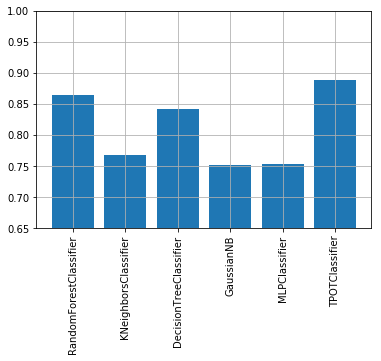

In [42]:
import matplotlib.pyplot as plt

plt.ylim(bottom=0.65, top=1)
plt.bar(range(len(results)), list(results.values()), align='center')
plt.xticks(range(len(results)), list(results.keys()), rotation="vertical")
plt.grid()
plt.show()

# Unused stuff

---
---
---